In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Loading the other modules I have in parent directories
import sys
PYTHONPATH="../"
sys.path.append(PYTHONPATH)
from dataProcessing import getDataLoaders
from models import ThreeCNN, ThreeCNN_Module, rnn_2dCNN
from train import check_accuracy, train, train_ThreeCNN
from plottingFcts import trainingMetrics, sigBkgEff, plotROC
from imageNumber_analysis import num_valAcc 
from learn_rate_optimize import filters_optimize, lr_optimize, lr_filters_optimize
import matplotlib.pyplot as plt

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


cuda


In [2]:
layer0_params = [32, 3, 3, 1, 1]
layer0_reduce = [1, 3, 93, 1, 1] # ---> Downsampling with one filter at the end

layer1_params = [32, 3, 3, 1, 1]
layer1_reduce = [1, 12, 9, 1, 1] # ---> Downsampling with one filter 

layer2_params = [32, 3, 3, 1, 1]
layer2_reduce = [1, 12, 3, 1, 1] # ---> downsampling with one filter 

rnn_params = [18, 18, 1]

layer3_params = [32, 3, 3, 1, 1]

fc_params = [18, 150, 100, 50, 3, 0.5]

In [3]:
# experiment 1 batch size: 64, image number: 30,000
# experiment 2 batch size: 1000, image number: 80,000 
batch_size = 1000
loader_train, loader_val, loader_test = getDataLoaders(batch_size=batch_size, N=80000)

In [19]:
advanced_rnn_1 = rnn_2dCNN(layer0_params, layer0_reduce, layer1_params, layer1_reduce, layer2_params, layer2_reduce, rnn_params, layer3_params, fc_params)

adv_optimizer = optim.Adam(advanced_rnn_1.parameters(), lr=4e-3)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(adv_optimizer, mode='max', patience=5, verbose=True)

hist, advModel = train(loader_train, loader_val, advanced_rnn_1, adv_optimizer, scheduler, epochs=50, returnBest=True)

# save the best model from training for 100 epochs 
torch.save(advModel.state_dict(), "../models/advTraining_1.pth.tar")

cuda

Epoch 1/50:
Iteration 0, loss = 1.2421
cuda
Got 2686 / 9000 correct (29.84)

Iteration 100, loss = 0.6108
cuda
Got 6398 / 9000 correct (71.09)

Iteration 200, loss = 0.5646
cuda
Got 6226 / 9000 correct (69.18)

Iteration 300, loss = 0.5044
cuda
Got 6254 / 9000 correct (69.49)

Iteration 400, loss = 0.5411
cuda
Got 6629 / 9000 correct (73.66)

Iteration 500, loss = 0.4680
cuda
Got 6572 / 9000 correct (73.02)

Iteration 600, loss = 0.4317
cuda
Got 6632 / 9000 correct (73.69)

Iteration 700, loss = 0.5538
cuda
Got 6678 / 9000 correct (74.20)

Iteration 800, loss = 0.5214
cuda
Got 6513 / 9000 correct (72.37)

cuda
Got 6721 / 9000 correct (74.68)
cuda
Got 40180 / 54000 correct (74.41)

Epoch 2/50:
Iteration 0, loss = 0.4407
cuda
Got 6677 / 9000 correct (74.19)

Iteration 100, loss = 0.4089
cuda
Got 6714 / 9000 correct (74.60)

Iteration 200, loss = 0.5499
cuda
Got 6707 / 9000 correct (74.52)

Iteration 300, loss = 0.4441
cuda
Got 6698 / 9000 correct (74.42)

Iteration 400, loss = 0.48

cuda
Got 6926 / 9000 correct (76.96)
cuda
Got 41640 / 54000 correct (77.11)

Epoch 13/50:
Iteration 0, loss = 0.4237
cuda
Got 6977 / 9000 correct (77.52)

Iteration 100, loss = 0.4303
cuda
Got 6857 / 9000 correct (76.19)

Iteration 200, loss = 0.4415
cuda
Got 6907 / 9000 correct (76.74)

Iteration 300, loss = 0.3823
cuda
Got 6996 / 9000 correct (77.73)

Iteration 400, loss = 0.3970
cuda
Got 6867 / 9000 correct (76.30)

Iteration 500, loss = 0.4610
cuda
Got 6948 / 9000 correct (77.20)

Iteration 600, loss = 0.4011
cuda
Got 6945 / 9000 correct (77.17)

Iteration 700, loss = 0.3807
cuda
Got 6998 / 9000 correct (77.76)

Iteration 800, loss = 0.3744
cuda
Got 6954 / 9000 correct (77.27)

cuda
Got 6900 / 9000 correct (76.67)
cuda
Got 41504 / 54000 correct (76.86)

Epoch 14/50:
Iteration 0, loss = 0.3474
cuda
Got 6929 / 9000 correct (76.99)

Iteration 100, loss = 0.5515
cuda
Got 6983 / 9000 correct (77.59)

Iteration 200, loss = 0.4093
cuda
Got 6908 / 9000 correct (76.76)

Iteration 300, loss 

Iteration 700, loss = 0.4487
cuda
Got 7038 / 9000 correct (78.20)

Iteration 800, loss = 0.4033
cuda
Got 7036 / 9000 correct (78.18)

cuda
Got 7033 / 9000 correct (78.14)
cuda
Got 42208 / 54000 correct (78.16)

Epoch 25/50:
Iteration 0, loss = 0.5174
cuda
Got 7036 / 9000 correct (78.18)

Iteration 100, loss = 0.4381
cuda
Got 7009 / 9000 correct (77.88)

Iteration 200, loss = 0.4747
cuda
Got 7030 / 9000 correct (78.11)

Iteration 300, loss = 0.4117
cuda
Got 7054 / 9000 correct (78.38)

Iteration 400, loss = 0.2682
cuda
Got 7046 / 9000 correct (78.29)

Iteration 500, loss = 0.3947
cuda
Got 7025 / 9000 correct (78.06)

Iteration 600, loss = 0.3832
cuda
Got 7020 / 9000 correct (78.00)

Iteration 700, loss = 0.4246
cuda
Got 7029 / 9000 correct (78.10)

Iteration 800, loss = 0.4000
cuda
Got 7016 / 9000 correct (77.96)

cuda
Got 7028 / 9000 correct (78.09)
cuda
Got 42180 / 54000 correct (78.11)

Epoch 26/50:
Iteration 0, loss = 0.3897
cuda
Got 7055 / 9000 correct (78.39)

Iteration 100, loss 

Iteration 600, loss = 0.3448
cuda
Got 7047 / 9000 correct (78.30)

Iteration 700, loss = 0.4078
cuda
Got 7027 / 9000 correct (78.08)

Iteration 800, loss = 0.4025
cuda
Got 7026 / 9000 correct (78.07)

cuda
Got 7054 / 9000 correct (78.38)
Epoch    35: reducing learning rate of group 0 to 4.0000e-05.
cuda
Got 42340 / 54000 correct (78.41)

Epoch 37/50:
Iteration 0, loss = 0.4019
cuda
Got 7032 / 9000 correct (78.13)

Iteration 100, loss = 0.3210
cuda
Got 7064 / 9000 correct (78.49)

Iteration 200, loss = 0.4128
cuda
Got 7082 / 9000 correct (78.69)

Iteration 300, loss = 0.3830
cuda
Got 7053 / 9000 correct (78.37)

Iteration 400, loss = 0.4303
cuda
Got 7064 / 9000 correct (78.49)

Iteration 500, loss = 0.3342
cuda
Got 7055 / 9000 correct (78.39)

Iteration 600, loss = 0.3178
cuda
Got 7039 / 9000 correct (78.21)

Iteration 700, loss = 0.4182
cuda
Got 7052 / 9000 correct (78.36)

Iteration 800, loss = 0.3441
cuda
Got 7043 / 9000 correct (78.26)

cuda
Got 7061 / 9000 correct (78.46)
cuda
Got 

Iteration 300, loss = 0.3394
cuda
Got 7053 / 9000 correct (78.37)

Iteration 400, loss = 0.4035
cuda
Got 7047 / 9000 correct (78.30)

Iteration 500, loss = 0.2833
cuda
Got 7076 / 9000 correct (78.62)

Iteration 600, loss = 0.3762
cuda
Got 7069 / 9000 correct (78.54)

Iteration 700, loss = 0.4970
cuda
Got 7062 / 9000 correct (78.47)

Iteration 800, loss = 0.2725
cuda
Got 7042 / 9000 correct (78.24)

cuda
Got 7050 / 9000 correct (78.33)
Epoch    47: reducing learning rate of group 0 to 4.0000e-07.
cuda
Got 42363 / 54000 correct (78.45)

Epoch 49/50:
Iteration 0, loss = 0.4316
cuda
Got 7065 / 9000 correct (78.50)

Iteration 100, loss = 0.3732
cuda
Got 7056 / 9000 correct (78.40)

Iteration 200, loss = 0.3334
cuda
Got 7029 / 9000 correct (78.10)

Iteration 300, loss = 0.3193
cuda
Got 7051 / 9000 correct (78.34)

Iteration 400, loss = 0.4149
cuda
Got 7071 / 9000 correct (78.57)

Iteration 500, loss = 0.4232
cuda
Got 7054 / 9000 correct (78.38)

Iteration 600, loss = 0.4033
cuda
Got 7052 / 9

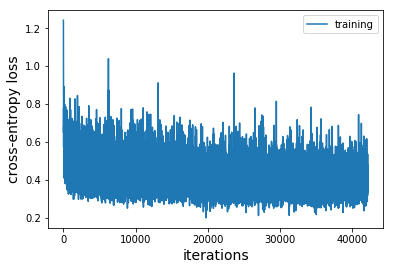

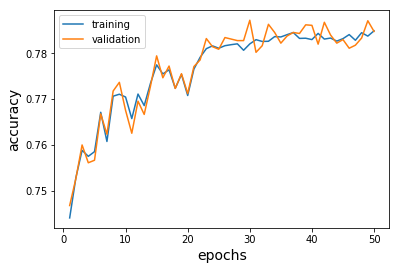

In [20]:
trainingMetrics(hist)

In [21]:
torch.save(advModel.state_dict(), "../models/advTraining_1.pth.tar")

In [5]:
# let's run the same neural network, but increase the batch size and the number of images --> does this
# smooth out the loss and accuracy curves? 

advanced_rnn_1_2 = rnn_2dCNN(layer0_params, layer0_reduce, layer1_params, layer1_reduce, layer2_params, layer2_reduce, rnn_params, layer3_params, fc_params)

adv_optimizer = optim.Adam(advanced_rnn_1_2.parameters(), lr=4e-3)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(adv_optimizer, mode='max', factor=0.6, patience=1, verbose=True)

hist, advModel_2 = train(loader_train, loader_val, advanced_rnn_1_2, adv_optimizer, scheduler, epochs=20, returnBest=True)

# save the best model from training for 100 epochs 
torch.save(advModel_2.state_dict(), "../models/advTraining_1_2.pth.tar")

cuda

Epoch 1/20:
Iteration 0, loss = 1.1139
cuda
Got 9309 / 24000 correct (38.79)

Iteration 100, loss = 0.4572
cuda
Got 17943 / 24000 correct (74.76)

cuda
Got 17707 / 24000 correct (73.78)
cuda
Got 106707 / 144000 correct (74.10)

Epoch 2/20:
Iteration 0, loss = 0.4636
cuda
Got 17746 / 24000 correct (73.94)

Iteration 100, loss = 0.4123
cuda
Got 18189 / 24000 correct (75.79)

cuda
Got 18362 / 24000 correct (76.51)
cuda
Got 110398 / 144000 correct (76.67)

Epoch 3/20:
Iteration 0, loss = 0.3907
cuda
Got 18325 / 24000 correct (76.35)

Iteration 100, loss = 0.4586
cuda
Got 18318 / 24000 correct (76.33)

cuda
Got 18468 / 24000 correct (76.95)
Epoch     2: reducing learning rate of group 0 to 2.4000e-03.
cuda
Got 110735 / 144000 correct (76.90)

Epoch 4/20:
Iteration 0, loss = 0.4335
cuda
Got 18506 / 24000 correct (77.11)

Iteration 100, loss = 0.4309
cuda
Got 18484 / 24000 correct (77.02)

cuda
Got 18538 / 24000 correct (77.24)
cuda
Got 111380 / 144000 correct (77.35)

Epoch 5/20:
Itera

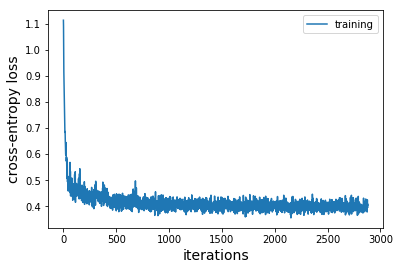

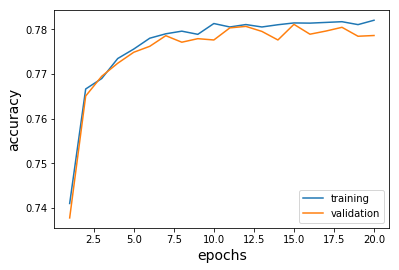

In [6]:
trainingMetrics(hist)

In [8]:
# it looks like our learning rate is too high, since the loss dives down to about 0.4 and stays there for the 
# rest of training. I'm going to try the scheduler again, with a smaller learning rate of ~ 1e-5
advanced_rnn_smLR = rnn_2dCNN(layer0_params, layer0_reduce, layer1_params, layer1_reduce, layer2_params, layer2_reduce, rnn_params, layer3_params, fc_params)

adv_optimizer = optim.Adam(advanced_rnn_smLR.parameters(), lr=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(adv_optimizer, mode='max', factor=0.6, patience=5, verbose=True)

hist, advModel_3 = train(loader_train, loader_val, advanced_rnn_smLR, adv_optimizer, scheduler, epochs=20, returnBest=True)

# save the best model from training for 100 epochs 
torch.save(advModel_2.state_dict(), "../models/advTraining_smLR.pth.tar")

cuda

Epoch 1/20:
Iteration 0, loss = 1.1384
cuda
Got 7723 / 24000 correct (32.18)

Iteration 100, loss = 1.0681
cuda
Got 9671 / 24000 correct (40.30)

cuda
Got 9958 / 24000 correct (41.49)
cuda
Got 60583 / 144000 correct (42.07)

Epoch 2/20:
Iteration 0, loss = 1.0730
cuda
Got 9969 / 24000 correct (41.54)

Iteration 100, loss = 1.0520
cuda
Got 11010 / 24000 correct (45.88)

cuda
Got 11361 / 24000 correct (47.34)
cuda
Got 69386 / 144000 correct (48.18)

Epoch 3/20:
Iteration 0, loss = 1.0381
cuda
Got 11648 / 24000 correct (48.53)

Iteration 100, loss = 1.0162
cuda
Got 12562 / 24000 correct (52.34)

cuda
Got 12798 / 24000 correct (53.33)
cuda
Got 77434 / 144000 correct (53.77)

Epoch 4/20:
Iteration 0, loss = 1.0099
cuda
Got 13062 / 24000 correct (54.43)

Iteration 100, loss = 0.9736
cuda
Got 13683 / 24000 correct (57.01)

cuda
Got 14038 / 24000 correct (58.49)
cuda
Got 84024 / 144000 correct (58.35)

Epoch 5/20:
Iteration 0, loss = 0.9752
cuda
Got 14111 / 24000 correct (58.80)

Iterati

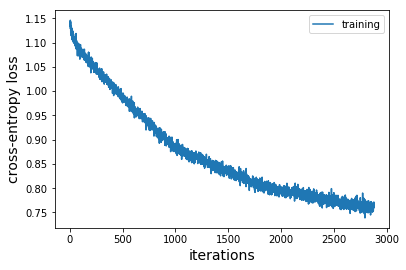

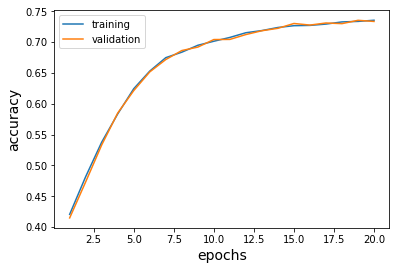

In [9]:
trainingMetrics(hist)

In [ ]:
# this loss curve looks better --> let's train this model again for 50 epochs or so, and train another model 
# that has a slightly higher initial learning rate ~ 1e-4 